In [30]:
# support functions
import math
import matplotlib.pyplot as plt
import copy
import numpy as np

def print_graph(y):
    N = len(y)
    x = list(i for i in range(N))
    plt.yscale("log")
    plt.xscale("log")
    plt.plot(x, y, 'go')
    plt.xlabel("N")
    plt.ylabel("Absolute error")

def gauss_method(A, b):
    n = len(A)
    b1 = copy.deepcopy(b)
    A1 = copy.deepcopy(A)
    for k in range(n):
        max_elem = A1[k][k]
        row_max_elem = k
        for m in range(k + 1, n):
            if (abs(A1[m][k]) > abs(max_elem)):
                max_elem = A1[m][k]
                row_max_elem = m
            A1[k], A1[row_max_elem] = A1[row_max_elem], A1[k]
            b1[k], b1[row_max_elem] = b1[row_max_elem], b1[k]
    
        if (A1[k][k] == 0):
            print("Can`t solve the system of equations")
        else: 
            for m in range(k + 1, n):
                coeff = -A1[m][k] / A1[k][k]
                for l in range(k, n):
                    A1[m][l] += A1[k][l] * coeff
                b1[m] += b1[k] * coeff
    
    x = [0] * n
    for i in range(n - 1, -1, -1):
        sum = 0
        for j in range(i, n):
            sum += A1[i][j] * x[j]
        x[i] = (b1[i] - sum) / A1[i][i]   
    return x

## IV.12.4 e: $x^2 - 20 * sinx = 0$

# МПИ

x = 2.752947099643055


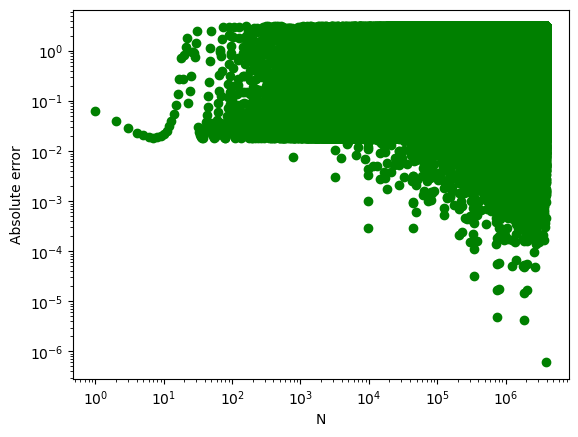

In [33]:
r = 1.0
x0 = math.pi / 2 # start point
y = []
while not r < 1e-6:
    x1 = math.sqrt(20 * abs(math.sin(x0)))
    r = abs(x0 - x1)
    x0 = x1
    y.append(r)

print_graph(y)   
print(f"x = {x1}")

# Метод Ньютона
First root is x = 0

Second root is between a = $\pi/2$ and b = $\pi$

x = 2.752946633818706


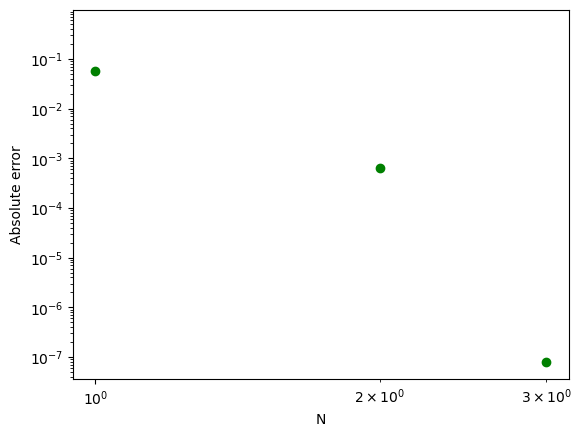

In [35]:
import math
r = 1.0
x0 = 3 * math.pi / 4 # start point
y = []
while not r < 1e-6:
    x1 = x0 - (x0 * x0 - 20 * math.sin(x0)) / (2 * x0 - 20 * math.cos(x0))
    r = abs(x0 - x1)
    x0 = x1
    y.append(r)

print_graph(y)
print(f"x = {x1}")

# IV.12.5 а
$sin(x + 1) - y = 1.2$

$2x + cosy = 2$

# МПИ

x = 0.5101501980169246
y = -0.20183839331551234


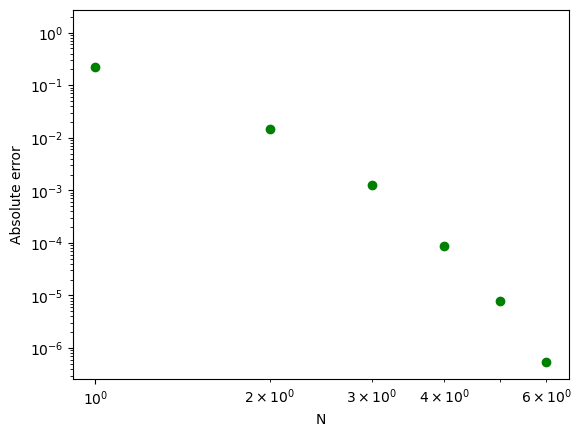

In [28]:
import math
r = 1.0
x0 = 1
y0 = 1
y = []
while not r < 1e-6:
    x1 = 1 - math.cos(y0) / 2
    y1 = math.sin(x0 + 1) - 1.2
    r = abs(math.sqrt((x0 - x1) * (x0 - x1) + (y0 - y1) * (y0 - y1)))
    x0 = x1
    y0 = y1
    y.append(r)
print_graph(y)
print(f"x = {x1}")
print(f"y = {y1}")

# Метод Ньютона

x = 0.5101501574507401
y = -0.20183841535657399


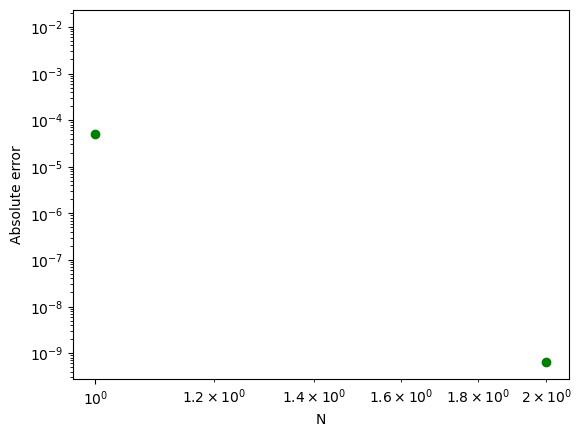

In [31]:
r = 1.0
x0 = 0.5
y0 = -0.2
y = []
while not r < 1e-6:
    A = [[math.cos(x0 + 1), -1], [2, -math.sin(y0)]]
    b = [y0 + 1.2 - math.sin(x0 + 1), 2 - math.cos(y0) - 2 * x0]
    s = gauss_method(A, b)
    x1 = x0 + s[0]
    y1 = y0 + s[1]
    r = abs(math.sqrt((x0 - x1) * (x0 - x1) + (y0 - y1) * (y0 - y1)))
    x0 = x1
    y0 = y1
    y.append(r)
    
print_graph(y)
print(f"x = {x1}")
print(f"y = {y1}")